In [1]:
# !pip3 install tensorflow_text

In [2]:
#Installing VADER to be used for sentiment scoring
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
# import tensorflow_text

In [4]:
#Import revelant libraries
import nltk
import string
import re
#Downloading revelant content
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
# !pip install tweepy

## Data Mining 

In [6]:
consumer_key = "*****************************************"
access_token = "*****************************************"
access_token_secret = "*****************************************"


In [7]:
#Import Tweepy API
import tweepy as tw

In [8]:
#getting authorizations
auth = tw.OAuthHandler(consumer_key, access_token_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [9]:
#searching for tweets
# Define the search term and the date_since date as variables
search_words = "@CallofDuty"
date_since = "2019-09-01" 

In [10]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",tweet_mode="extended").items(10000)
tweets

In [11]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10000)
tweets

# Iterate and print tweets
# tweets_text = [[tweet.text, tweet.user.location,tweet.created_at] for tweet in tweets]
# tweets_text


In [12]:
# tweets = pd.DataFrame(data=tweets_text, 
#                     columns=['text', "location", 'Date'])
# tweets.to_csv('callofduty.csv')
# tweets.shape

In [13]:
#Main list consists of cleaned data
def clean_text(x_text):
  main = []

  # Storing all punctuations using RE library like !;,"% etc
  re_puncs = re.compile('[%s]' % re.escape(string.punctuation))
  # Storing all stop words like a, an, the, when, there, this etc
  stop_word  = set(stopwords.words('english'))
  # Making Lemmatizing object
  lem = WordNetLemmatizer()
  # Using Porter Stemmer
  p_stem = PorterStemmer()
  # Traversing whole dataset
  for i in tqdm(range(len(x_text))):
      # Tokenization
      tokens = word_tokenize(str(x_text[i]))
      # Converting all characters to lower case
      tokens = [w.lower() for w in tokens]
      # Remove all punctuations from sentenses
      tokens = [re_puncs.sub('', w) for w in tokens]
      
      # Checking all words is alphabets or not
      tokens = [i for i in tokens if i.isalpha()]
      # Removing all stop words from the sentenses
      tokens = [w for w in tokens if w not in stop_word]      
      # Stemming process
      tokens = [p_stem.stem(w) for w in tokens]
      # Doing Lemmatizing of words
      tokens = [lem.lemmatize(w) for w in tokens]
      # Finally convert to string
      r = ' '.join(tokens)
      # Storing the final string into main list
      main.append(r)
  return main

In [14]:
#Function for generating sentiment based on the polarity score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer()
def sentiment_generator(df):
  tweet_sentiment = []
  for score in df['polarity_score']:
    if score > 0.05:
      tweet_sentiment.append('Positive')
    elif score < 0.05 and score >= -0.05:
      tweet_sentiment.append('Neutral')
    elif score < -0.05:
      tweet_sentiment.append('Negative')
    else:
      tweet_sentiment.append(np.nan)
  return tweet_sentiment

In [15]:
#Fuctions to filter tweets into ;positive, negative, neutral, all_tweets based on entity
def tweets_filter(df):
  positive = df['Text'][(df.Sentiment =='Positive')]
  negative = df['Text'][(df.Sentiment =='Negative')]
  neutral = df['Text'][(df.Sentiment =='Neutral') ]
  all_tweets = df['Text']
  return[positive, negative, neutral, all_tweets]

In [16]:
#Fuction for wordcloud visiulaization
def show_word_cloud(cloud, title, max_words):
  cloud  = " ".join(cloud.to_numpy().tolist())
  cloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=max_words).generate(cloud)
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

## Data understanding

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Reading the file mine tweets.
data_2 = pd.read_excel('/content/drive/MyDrive/callofduty.xlsx')

In [19]:
#Checking the data types
print(data_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  10000 non-null  float64       
 1   Text        10000 non-null  object        
 2   location    6269 non-null   object        
 3   Date        10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 312.6+ KB
None


In [20]:
#checking colums
data_2.columns

Index(['Unnamed: 0', 'Text', 'location', 'Date'], dtype='object')

In [21]:
#Checking for duplicates by counting unique values
print(data_2.nunique())

Unnamed: 0    10000
Text           3827
location       3180
Date           8447
dtype: int64


In [22]:
#Checking for null values
data_2.isnull().sum()

Unnamed: 0       0
Text             0
location      3731
Date             0
dtype: int64

In [23]:
#Droping this column;'Unnamed: 0'
data_2 = data_2.drop('Unnamed: 0',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [24]:
#Checking the dimesion of the data.
data_2.shape

(10000, 3)

# Data Cleaning

In [25]:

x_train = data_2['Text'] # varibale assignment
x_train = clean_text(x_train) # claning the tweets using the clean_text function
data_2['Text'] = x_train

100%|██████████| 10000/10000 [00:07<00:00, 1297.72it/s]


In [26]:
#Preview of the cleaned dataset
data_2.head()

Text              location  \
0  rt callofduti new era come tweet first receiv ...           Puerto Rico   
1                rt callofduti see pt summergamefest  roblox sex simulator   
2  beenoxcodpc callofduti pmsl would take away ad...               Glasgow   
3  rt callofduti new era come tweet first receiv ...                   NaN   
4                               callofduti know need        Cincinnati, OH   

                 Date  
0 2022-06-09 06:30:49  
1 2022-06-09 06:30:47  
2 2022-06-09 06:30:32  
3 2022-06-09 06:30:24  
4 2022-06-09 06:30:08

In [27]:
#Checking for null values again
print(data_2.isnull().sum())

Text           0
location    3731
Date           0
dtype: int64


In [28]:
#We will update tweets with missing locations as "unknown"
data_2['location']= data_2['location'].replace(to_replace=[np.nan], value = 'Uknown')

In [29]:
#Adding day of the weeks and month derived from the Date feature.
data_2['day_of_week'] = data_2['Date'].dt.day_name()
data_2['Month'] = data_2['Date'].dt.month_name()

In [30]:
data_2.head()

Text              location  \
0  rt callofduti new era come tweet first receiv ...           Puerto Rico   
1                rt callofduti see pt summergamefest  roblox sex simulator   
2  beenoxcodpc callofduti pmsl would take away ad...               Glasgow   
3  rt callofduti new era come tweet first receiv ...                Uknown   
4                               callofduti know need        Cincinnati, OH   

                 Date day_of_week Month  
0 2022-06-09 06:30:49    Thursday  June  
1 2022-06-09 06:30:47    Thursday  June  
2 2022-06-09 06:30:32    Thursday  June  
3 2022-06-09 06:30:24    Thursday  June  
4 2022-06-09 06:30:08    Thursday  June

In [31]:
data_2 = data_2.dropna(subset=['Text']) #droping missing values under the the Text column
data_2.head()

Text              location  \
0  rt callofduti new era come tweet first receiv ...           Puerto Rico   
1                rt callofduti see pt summergamefest  roblox sex simulator   
2  beenoxcodpc callofduti pmsl would take away ad...               Glasgow   
3  rt callofduti new era come tweet first receiv ...                Uknown   
4                               callofduti know need        Cincinnati, OH   

                 Date day_of_week Month  
0 2022-06-09 06:30:49    Thursday  June  
1 2022-06-09 06:30:47    Thursday  June  
2 2022-06-09 06:30:32    Thursday  June  
3 2022-06-09 06:30:24    Thursday  June  
4 2022-06-09 06:30:08    Thursday  June

In [32]:
#Checking for missing values again
print(data_2.isnull().sum())

Text           0
location       0
Date           0
day_of_week    0
Month          0
dtype: int64


In [33]:
#Counting unique values
data_2.nunique()

Text           3585
location       3181
Date           8447
day_of_week       2
Month             1
dtype: int64

In [34]:
#removing duplicate tweets while retaining the first occurance
data_2= data_2.drop_duplicates( 'Text' , keep='first')

In [35]:
#compelling all text data into string data type
data_2['Text']= data_2['Text'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
data_2.head()

Text              location  \
0  rt callofduti new era come tweet first receiv ...           Puerto Rico   
1                rt callofduti see pt summergamefest  roblox sex simulator   
2  beenoxcodpc callofduti pmsl would take away ad...               Glasgow   
4                               callofduti know need        Cincinnati, OH   
5  rt callofduti happi nationalbestfriendsday tag...                Uknown   

                 Date day_of_week Month  
0 2022-06-09 06:30:49    Thursday  June  
1 2022-06-09 06:30:47    Thursday  June  
2 2022-06-09 06:30:32    Thursday  June  
4 2022-06-09 06:30:08    Thursday  June  
5 2022-06-09 06:29:57    Thursday  June

In [37]:
data_2.shape

(3585, 5)

In [38]:
#obtaining the polarity socre of the tweets using VADER and storing them using the varibale 'polarity_score'
data_2['polarity_score'] = data_2['Text'].apply(lambda data_2: analyser.polarity_scores(data_2)['compound'])
data_2.head()

Text              location  \
0  rt callofduti new era come tweet first receiv ...           Puerto Rico   
1                rt callofduti see pt summergamefest  roblox sex simulator   
2  beenoxcodpc callofduti pmsl would take away ad...               Glasgow   
4                               callofduti know need        Cincinnati, OH   
5  rt callofduti happi nationalbestfriendsday tag...                Uknown   

                 Date day_of_week Month  polarity_score  
0 2022-06-09 06:30:49    Thursday  June             0.0  
1 2022-06-09 06:30:47    Thursday  June             0.0  
2 2022-06-09 06:30:32    Thursday  June             0.0  
4 2022-06-09 06:30:08    Thursday  June             0.0  
5 2022-06-09 06:29:57    Thursday  June             0.0

In [39]:
#calling the sentiment generator function to obtain sentiments based on the polarity score of the text
data_2['Sentiment']= sentiment_generator(data_2) 
data_2.sample(10)

Text            location  \
3909  callofduti warzon also featur technolog power ...              Canada   
1593  rt callofduti loverboylaw team stay frosti fir...              Africa   
340                    callofduti easi solut nt russian              Uknown   
6335                                  callofduti fourth  Massachusetts, USA   
5138                                  callofduti love u       in your heart   
7795                       makgsnak callofduti ok thank              Uknown   
8819  announc call duti modern warfar ii callofduti ...       San Diego, CA   
2601    callofduti infinityward never tell u launch lol              Uknown   
7826  ok thing steam callofduti actual up price doll...              Canada   
6706  tempetowntrev callofduti theonewildman preorde...              Uknown   

                    Date day_of_week Month  polarity_score Sentiment  
3909 2022-06-09 01:04:25    Thursday  June          0.0000   Neutral  
1593 2022-06-09 03:42:08    Thursday  June          0.0000   Neutral  
340  2022-06-09 05:48:16    Thursday  June          0.0000   Neutral  
6335 2022-06-08 23:03:13   Wednesday  June          0.0000   Neutral  
5138 2022-06-09 00:01:39    Thursday  June          0.6369  Positive  
7795 2022-06-08 22:13:17   Wednesday  June          0.5719  Positive  
8819 2022-06-08 21:37:47   Wednesday  June          0.0000   Neutral  
2601 2022-06-09 02:19:12    Thursday  June          0.4215  Positive  
7826 2022-06-08 22:12:38   Wednesday  June          0.5719  Positive  
6706 2022-06-08 22:50:52   Wednesday  June          0.3182  Positive

In [40]:
print(data_2.isnull().sum())

Text              0
location          0
Date              0
day_of_week       0
Month             0
polarity_score    0
Sentiment         0
dtype: int64


In [41]:
data_2 = data_2.dropna(subset = ['Sentiment'])

# Data Preparation

In [42]:
[positive, negative, neutral, all_tweets] = tweets_filter(data_2) #filtering the tweets using tweet_filter function into positive, negative and neutral subsets

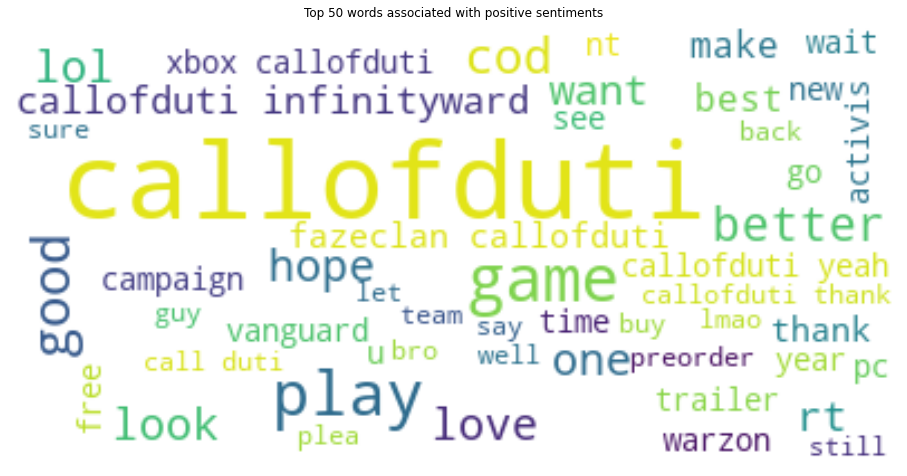

In [43]:
show_word_cloud(positive, "Top 50 words associated with positive sentiments", 50) # calling show_word_cloud fuction to display to 50 positive words

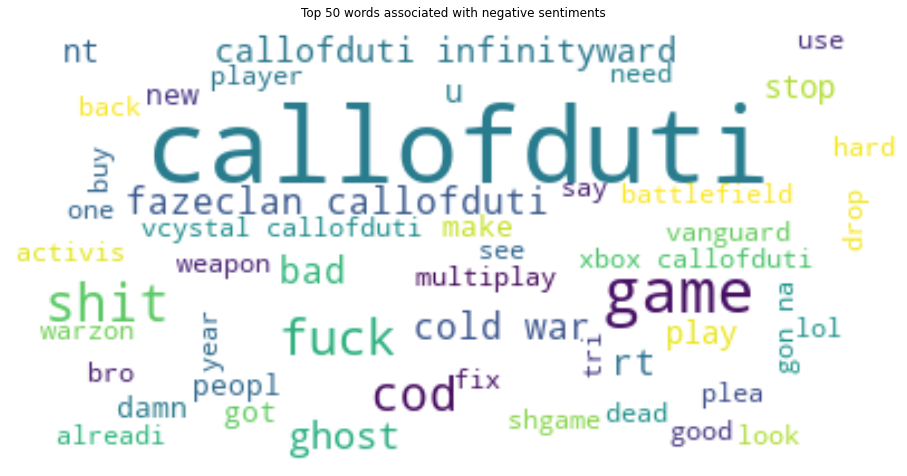

In [44]:
show_word_cloud(negative,  "Top 50 words associated with negative sentiments", 50) # calling show_word_cloud fuction to display to 50 negative words

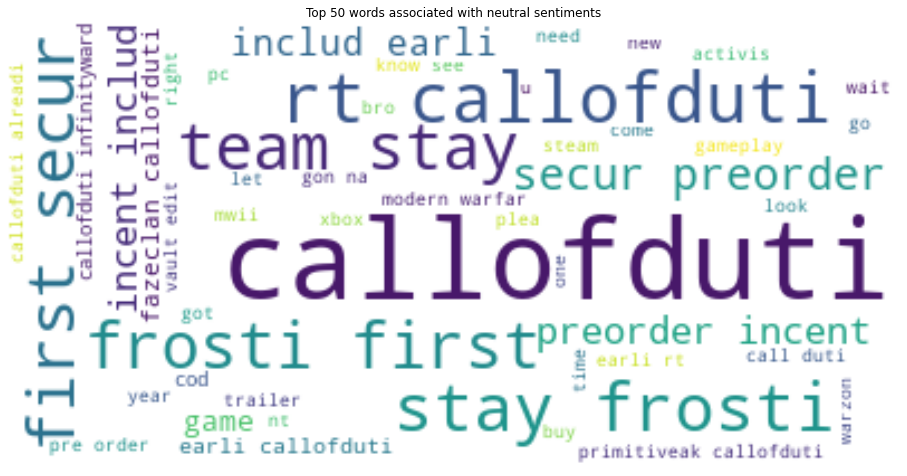

In [45]:
show_word_cloud(neutral,  "Top 50 words associated with neutral sentiments", 50) # calling show_word_cloud fuction to display to 50 neutral words

In [46]:
data_2.describe() #obtaining the descriptive statistics for the numerical data

polarity_score
count     3585.000000
mean         0.045584
std          0.338070
min         -0.934900
25%          0.000000
50%          0.000000
75%          0.296000
max          0.897900

In [47]:
cat_df = data_2.select_dtypes(include = 'object') #obtaining categorical data
cat_df.describe() # obtaining the descriptive statistics of categorical dataset

Text location  \
count                                                3585     3585   
unique                                               3585     1154   
top     rt callofduti new era come tweet first receiv ...   Uknown   
freq                                                    1     1493   

       day_of_week Month Sentiment  
count         3585  3585      3585  
unique           2     1         3  
top       Thursday  June   Neutral  
freq          1892  3585      1813

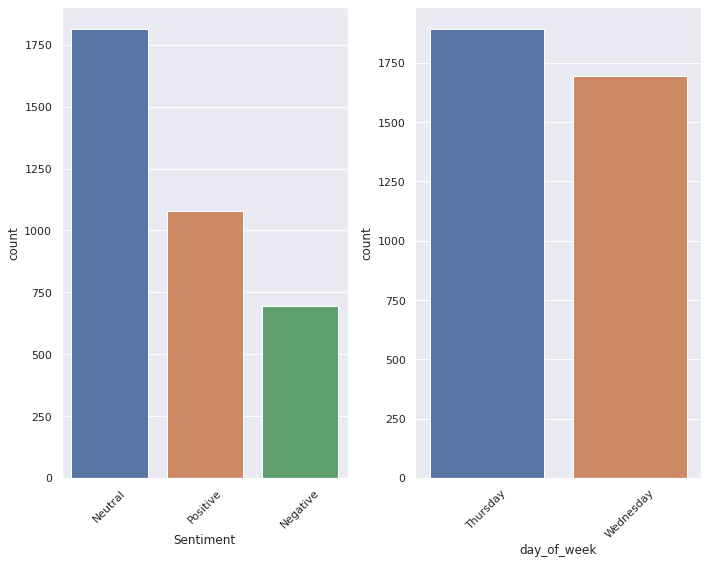

In [48]:
# Distribution of tweets
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(10,8))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
ax= sns.countplot(x="Sentiment", data=data_2, order=data_2.Sentiment.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x="day_of_week", data=data_2, order=data_2.day_of_week.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show();

In [49]:
data_2[['location']].groupby(['location'])['location'].count().nlargest(10) #Obtaining the top frequent Locations


location
Uknown             1493
United States        73
Los Angeles, CA      26
California, USA      23
New Jersey, USA      21
Texas, USA           18
Atlanta, GA          17
Australia            16
Canada               16
New York, USA        16
Name: location, dtype: int64

## Data exploratory analysis

In [50]:
# A function for converting our target values in numerical data using onehotencoding
def y_encoder(y):
  enc = OneHotEncoder(handle_unknown='ignore')
  ip = np.array(y)
  ip = ip.reshape(-1, 1)
  y = enc.fit_transform(ip).toarray()
  return y

In [51]:
y = data_2['Sentiment']# obtaining the target varibales and assigning y 
X = data_2['Text'] # obtaining the predictor varibales and assigning x  

In [52]:
y = y_encoder(y) # converting our target values in numerical data using onehotencoding

In [53]:
print(y.shape)

(3585, 3)


In [54]:
# Converting the main into Vector using CountVectorizer and then convert it to array
cnt = CountVectorizer(analyzer="word")
X_train = cnt.fit_transform(X).toarray()


In [55]:
#Getting the term-frequency inverse document frequency (IDF) scores
from sklearn.feature_extraction.text import TfidfTransformer
tf_insta = TfidfTransformer()
X_train_filter = tf_insta.fit_transform(X_train).toarray() #get IDF scores and converting them into numeric array

In [56]:
print(X_train_filter.shape)

(3585, 4016)


In [57]:
#configuring the Neural network model using Keras and TensorFlow
def model_params(input_dim, output):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(512, input_dim=input_dim, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(102, activation='relu'),
      tf.keras.layers.Dropout(0.165),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(output, activation='softmax')
  ])
  model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
  return model 

In [58]:
model_1 = model_params(4016, 3)# inputing the parameteres ; input length and output

model_1

In [59]:
history = model_1.fit(X_train_filter, y, epochs=8, batch_size=16, validation_split= 0.2, verbose=1,shuffle=True) #fitting the model to the training dataset and spliting the data into 80:20

Epoch 1/8
180/180 [==============================] - 4s 17ms/step - loss: 0.8296 - accuracy: 0.6161 - val_loss: 0.6881 - val_accuracy: 0.6946
Epoch 2/8
180/180 [==============================] - 3s 17ms/step - loss: 0.2850 - accuracy: 0.8881 - val_loss: 0.4993 - val_accuracy: 0.8215
Epoch 3/8
180/180 [==============================] - 3s 17ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.5573 - val_accuracy: 0.8173
Epoch 4/8
180/180 [==============================] - 3s 17ms/step - loss: 0.0128 - accuracy: 0.9972 - val_loss: 0.7669 - val_accuracy: 0.8201
Epoch 5/8
180/180 [==============================] - 3s 16ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.8948 - val_accuracy: 0.8257
Epoch 6/8
180/180 [==============================] - 3s 17ms/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.8608 - val_accuracy: 0.8243
Epoch 7/8
180/180 [==============================] - 3s 17ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.9143 - val_accuracy: 0.8285
Epoch 

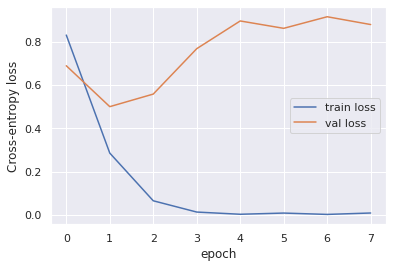

In [60]:
#Evaluating the model performance using the loss function
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()

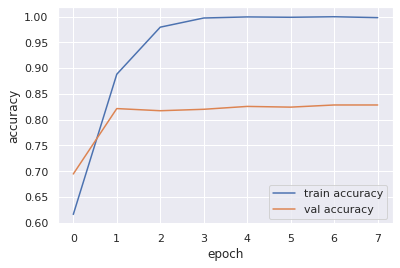

In [61]:
#Evaluating the model using accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();